# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 4:
1. 1712615 - Nguyễn Trọng Nghĩa - [GitHub](https://github.com/nguyentrongnghia142)
2. 1712683 - Phạm Hoàng Phương - [Github](https://github.com/superman19993)
3. 1712718 - Huỳnh Thanh Sang - [GitHub](https://github.com/hts7117)
4. 1712584 - Nguyễn Công Lý - [GitHub](https://github.com/conglyne222)

Link thùng chứa Github của nhóm: [Repo](https://github.com/nguyentrongnghia142/CommonLit-Readability-Prize)

## Mô tả bài toán
[Bài toán](https://www.kaggle.com/c/commonlitreadabilityprize/overview)

### Bối cảnh


* Đọc là một kỹ năng cần thiết để thành công trong học tập, Khi học sinh tiếp cận được những đoạn văn với mức độ thách thức phù hợp, chúng sẽ phát triển kỹ năng đọc một cách tự nhiên.

* CommonLit là một tổ chức phi lợi nhuận phục vụ hơn 20 tr giáo viên và học sinh với các bài học đọc và viết kĩ thuật số miễn phí cho các lớp 3-12, cùng với đại học bang Georgia, một trường đại học nghiên cứu ở Atlanta, đã tổ chức 1 cuộc thi nhằm cải thiện phương pháp đánh giá khả năng đọc.



### Nội dung


*   Trong cuộc thị này, người tham gia sẽ xây dựng các thuật toán để đánh giá mức độ phức tạp của việc đọc các đoạn văn để sử dụng trong lớp học từ lớp 3-12. Để đạt được điều này, phải kết hợp kĩ năng học máy của họ để làm việc với 1 tập dữ liệu bao gồm người đọc từ nhiều nhóm tuổi khác nhau với một số lượng lớn các văn bản thuộc nhiều lĩnh vực khác nhau.


*   Nếu thành công, bạn đã hỗ trợ các giáo viên và sinh viên, các nhà phát triền chương trình giảng dạy đọc viết có thể đánh giá nhanh chóng và chính xác các tài liệu trong lớp học của họ. Quan trọng nhất, học sinh sẽ được hưởng lợi từ việc đánh giá độ phức tạp và khả năng đọc của họ, giúp họ cải thiện các kỹ năng đọc thiết yếu dễ dàng hơn nhiều.



### Đánh giá

-	Các bài dự thi sẽ được đánh giá dựa trên độ lỗi RMSE: 

    ![image.png](https://scontent.fdad1-1.fna.fbcdn.net/v/t1.15752-9/258845405_591261328774655_4260656527898854926_n.png?_nc_cat=109&ccb=1-5&_nc_sid=ae9488&_nc_ohc=JcFQuPsmYnYAX-OYyFs&_nc_ht=scontent.fdad1-1.fna&oh=491e243d6da6d57179a18d30529a8466&oe=61BF2150)


### Submission file:
-	Bao gồm ID và độ dễ đọc của đoạn trích:

    ![image.png](https://scontent.fdad1-2.fna.fbcdn.net/v/t1.15752-9/254632714_433915911583493_5614680366254606947_n.png?_nc_cat=102&ccb=1-5&_nc_sid=ae9488&_nc_ohc=omTcknGdud8AX8hu4Fv&_nc_ht=scontent.fdad1-2.fna&oh=9ad8860d2bb51f4ab489fecd599a056d&oe=61BECC2F)


### Chi tiết dữ liệu
  1. 	Id:  mã id của đoạn trích (unique)
  2.   url_legal: đường dẫn của đoạn trích- trường này có thể trống trong tập test
  3.   license: bản quyền của đoạn trích- trường này có thể trống trong tập test
  4.   excerpt: nội dung đoạn trích cần dự đoán độ dễ đọc
  5.   target: độ dễ của đoạn trích (được lấy từ nhiều lĩnh vực và được nhiều người ở các độ tuổi khác nhạu đánh giá)
  6.   standard_error: thước đo chênh lệch điểm số giữa nhiều người đánh giá cho mỗi đoạn trích. Không được bao gồm trong tập test.

## Giải quyết bài toán
[Giải pháp](https://www.kaggle.com/c/commonlitreadabilityprize/discussion/258148) - Đứng thứ 4 trong private leaderboard (🏅️ 4th Place Solution (0.447) 🏅️)

#### Lấy dữ liệu


In [ ]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1_A5Y2u2XjFVfxVBr6flozZ-Gr0gKRaGm" -O commonlitreadabilityprize.zip &> /dev/null
!mkdir -p input_data/commonlitreadabilityprize
!mkdir -p output/commonlitreadabilityprize
!mkdir commonlitreadabilityprize
!unzip /content/commonlitreadabilityprize.zip -d input_data/commonlitreadabilityprize/

Archive:  /content/commonlitreadabilityprize.zip
  inflating: input_data/commonlitreadabilityprize/sample_submission.csv  
  inflating: input_data/commonlitreadabilityprize/test.csv  
  inflating: input_data/commonlitreadabilityprize/train.csv  


#### EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("train.csv",index_col=0)
data_train.head(3)

,url_legal,license,excerpt,target,standard_error
id,,,,,
c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676


In [ ]:
data_train = data_train.dropna(axis = 1)
data_train.shape

(2834, 3)

In [ ]:
data_train.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


* Giá trị nhỏ nhất cột độ lệch chuẩn có giá trị 0. Nguyên nhân có thể là đoạn trích được ít người đánh giá. 

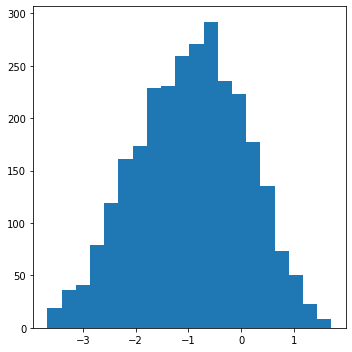

In [ ]:
df = data_train
n_bins = 20
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True, tight_layout=True)

axs.hist(df.target, bins=n_bins);
# axs[1].hist(df.standard_error, bins=n_bins);

* Nhận xét :
  - Đa phần các đoạn text đều trong tập train đều ở mức độ khó.

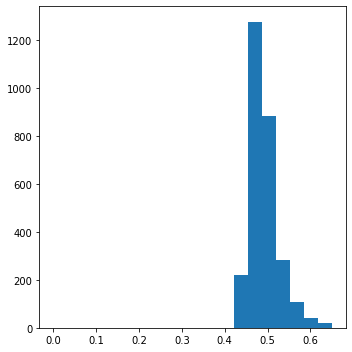

In [ ]:
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True, tight_layout=True)

axs.hist(df.standard_error, bins=n_bins);

* Nhận xét: Độ lệch chuẩn của các đánh giá đa phần giao động trong khoảng 0.5

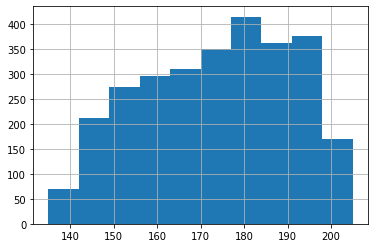

In [ ]:
df["word_count"] = df['excerpt'].str.split().apply(len)
df["word_count"].hist();

* Nhận xét: Phần lớn độ dài các đoạn trích nằm trong khoảng từ 300-400.

In [ ]:
 total = df['excerpt'].str.split().explode().value_counts().sum()
 stopwords = df['excerpt'].str.split().explode().value_counts().nlargest(50).sum()
 print(len(df['excerpt'].str.split().explode().unique()))
 print((stopwords / total) * 100)

54381
39.02792765043419


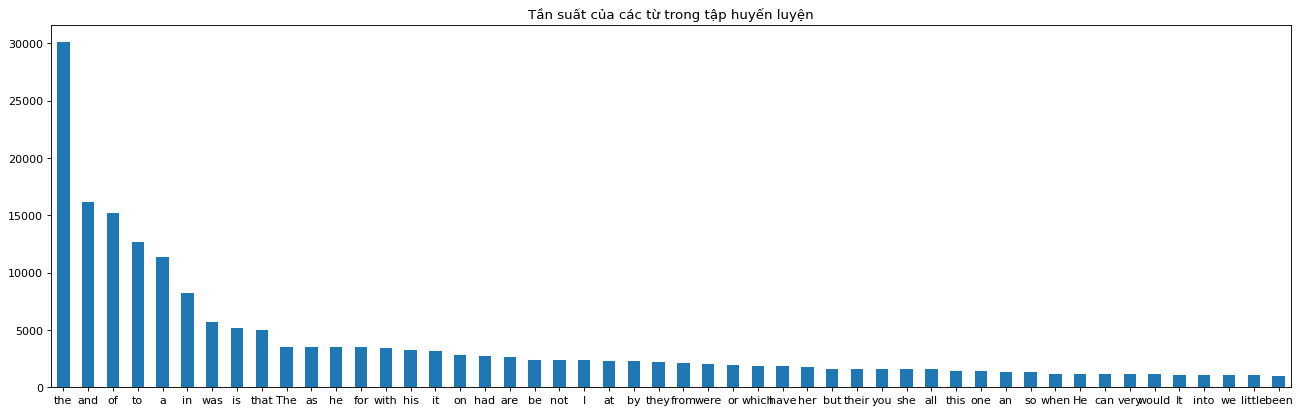

In [ ]:
plt.figure(figsize = (20, 6), dpi = 80)
df['excerpt'].str.split().explode().value_counts().nlargest(50).plot.bar(rot = 0)
plt.title("Tần suất của các từ trong tập huyến luyện");

* Nhận xét: 
 - Giống như mong đợi thì các từ stopwords chiếm phần lớn từ trong dữ liệu. 
 - Stopword Chiếm khoảng 40% trong tổng số lượng từ

### Tóm tắt về giải pháp
#### Tổng quát 
* Tác giả sử dụng kỹ thuật 5 fold CV với 5 seed khác nhau để tạo ra nhiều checkpoint khác nhau.
* Và áp dụng với nhiều mô hình khác nhau.
* Kết quả quả cuối cùng tác giả tổng hợp lại với 3 cách chính:
  - RigdeCV (LOO) 
  - BayesianRidgeRegression
  - BigChaos
* Đồng thời áp dụng một số kĩ thuật khác như thêm các thuộc tính (flesch_reading_ease ,smog_index) , thêm AttentionBlock.

#### Thêm thuộc tính


* flesch_reading_ease là điểm dễ đọc của đoạn trích.
  - Công thức: 

    ![picture](https://readable.com/wp-content/uploads/2017/01/FLESCHREADINGEASE.png)

  - Đánh giá kết quả:

    ![picture](https://seodesignchicago.com/wp-content/uploads/2021/09/Flesch-Reading-Ease.png)
* smog_index là ước lượng số năm học để đọc đoạn trích.
  - Công thức:

    ![picture](https://readable.com/wp-content/uploads/2019/01/SMOG-readability-formula-1-768x304.png)

  - Ví dụ: kết quả là 9 thì học sinh lớp 9 có thể đọc đoạn trích đó.

#### Phương thức tổng hợp
 

- RigdeCV:     
    Xây dựng một mô hình hồi quy có kết hợp kỹ thuật CV 
- BayesianRidgeRegression: 

    BayesianRidge xây dựng hồi quy tuyến tính sử dụng phân phối xác suất thay vì ước lượng điểm.

    RidgeRegression là một kỹ thuật để phân tích dữ liệu hồi quy nhiều lần. 

    Một trong những loại Hồi quy Bayesian hiệu quả là Bayesian Ridge Regression, ước tính mô hình xác suất cho các bài toán hồi quy.

    LOOCV là một phương pháp Cross Validation: Chia tập dữ liệu thành K tập con (K = số dữ liệu). Quá trình học của máy có K lần. Mỗi lần, 1 tập con được dùng để kiểm tra và K-1 tập con còn lại được dùng để huấn luyện.
- Bigchaos:    
    Big chaos solution là một phương pháp Collaborative filtering đã được áp dụng trong bài toán Recommender system.

    ![image.png](https://scontent.fdad1-2.fna.fbcdn.net/v/t1.15752-9/257430565_582013389559613_5705009368260678979_n.png?_nc_cat=102&ccb=1-5&_nc_sid=ae9488&_nc_ohc=YNARF7N0gU8AX_ellxS&_nc_ht=scontent.fdad1-2.fna&oh=69e274b018003c81d4338c57cfccfe91&oe=61C2D4AC)
    Trong đó thuật toán sẽ dự đoán ratings của những bộ phim mà người dùng chưa xem, các phim có điểm ratings cao sẽ được recommend cho người dùng.
    Tuy đạt độ lỗi nhỏ hơn (0.446) nhưng tác tin tưởng 2 phương pháp RigdeCV và BayesianRidgeRegression nên đã chọn phương pháp RidgeCV &  BayesianRidgeRegression làm 2 lần submit cuối cùng của tôi với điểm số cũ là   0,447.


### Thực nghiệm

#### Thư viện

In [ ]:
# @title requirements.txt
%%writefile requirements.txt

torch==1.10.0
numpy==1.19.2
tqdm==4.49.0
transformers==4.8.2
textstat
pytorch_lightning==1.5.4
gspread_dataframe==3.2.1
gspread==3.7.0
pandas==1.3.4
wandb==0.11.2
coolname==1.1.0
accelerate==0.3.0
PyYAML==5.4.1
scikit_learn==0.24.2

Writing requirements.txt


In [ ]:
# @title hyperparams
%%writefile commonlitreadabilityprize/hyperparams.yml

roberta_base:
  # model_name: deepset/roberta-base-squad2
  model_name: roberta-base
  # model_name: xlm-roberta-base
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True


bigbird:
  model_name: google/bigbird-roberta-large
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True


roberta_large:
  model_name: roberta-large
  # model_name: xlm-roberta-large
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True


roberta_large_squad:
  model_name: deepset/roberta-large-squad2
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True


distilroberta:
  model_name: distilroberta-base
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True


albert:
  model_name: albert-large-v2
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00003
  weight_decay: 1.0
  val_check_interval: 5
  eps: 0.000001
  betas: !!python/tuple [0.9, 0.999]
  kl_loss: True
  swa: True
  warmup: 100
  grad_clip_val: 1.0


funnel:
  model_name: funnel-transformer/large-base
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  eps: 0.0001
  betas: !!python/tuple [0.9, 0.999]
  kl_loss: True
  swa: True
  warmup: 100


bert_base:
  model_name: bert-base-uncased
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True


bert_large:
  model_name: bert-large-cased
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True


bert_large_wm:
  model_name: bert-large-cased-whole-word-masking
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True


deberta_base:
  model_name: microsoft/deberta-base
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True


deberta_large:
  model_name: microsoft/deberta-large
  gpus: 1
  batch_size: 12
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True

  
deberta_xlarge:
  model_name: microsoft/deberta-v2-xlarge
  gpus: 1
  plugins: ddp_sharded
  accelerator: ddp
  precision: 16
  batch_size: 10
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True


bart_base:
  model_name: facebook/bart-base
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True


bart_large:
  model_name: facebook/bart-large
  gpus: 1
  batch_size: 12
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True


st_labse:
  model_name: sentence-transformers/LaBSE
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True


# https://www.sbert.net/docs/pretrained_models.html
st_paraphrase:
  model_name: sentence-transformers/paraphrase-mpnet-base-v2
  gpus: 1
  batch_size: 32
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True


sentence_bert:
  model_name: deepset/sentence_bert
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.000025
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True


gpt2:
  model_name: gpt2
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True


electra:
  model_name: google/electra-large-discriminator
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00001
  warmup: 100
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: True
  swa: True


convbert:
  model_name: YituTech/conv-bert-base
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True


ctrl:
  model_name: ctrl  # 6.5GB!!
  gpus: 1
  batch_size: 16
  max_epochs: 6
  lr: 0.00005
  weight_decay: 1.0
  val_check_interval: 5
  kl_loss: False
  swa: True

Writing commonlitreadabilityprize/hyperparams.yml


In [ ]:
!pip install -qq ruamel.yaml==0.17.4
!pip install -r requirements.txt

In [ ]:
import pandas as pd
import numpy as np 
import yaml
from ruamel.yaml.comments import  CommentedMap as OrderedDict, CommentedSeq as OrderedList
from ruamel.yaml.main import round_trip_load as yaml_load, round_trip_dump as yaml_dump
from ruamel.yaml import YAML

In [ ]:
import torch
torch.__version__

'1.10.0+cu111'

In [ ]:
config = {"roberta_base":
          {"model_name": "deepset/roberta-base-squad2",
           "gpus":1,
           "batch_size":16,
           "max_epochs":6,
           "lr":"0.00005",
           "weight_decay": 0.1,
           "val_check_interval":5,
           "kl_loss": True,
           "swa": True
          }} 

yml = YAML()

# print(yaml_dump(shopping_list))
with open(r'hyperparams.yml', 'wb') as file:
    documents = yml.dump(config, file)

#### Utils

In [ ]:
def add_weight_decay(model, weight_decay=1e-5, skip_list=()):
    decay = []
    no_decay = []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue
        if len(param.shape) == 1 or any(s in name for s in skip_list):
            no_decay.append(param)
        else:
            decay.append(param)
    return [
        {"params": no_decay, "weight_decay": 0.0},
        {"params": decay, "weight_decay": weight_decay},
    ]


def get_optimizer_params(model, type="s"):
    # differential learning rate and weight decay
    param_optimizer = list(model.named_parameters())
    learning_rate = 5e-5
    no_decay = ["bias", "gamma", "beta"]
    if type == "s":
        optimizer_parameters = filter(lambda x: x.requires_grad, model.parameters())
    elif type == "i":

        optimizer_parameters = [
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if not any(nd in n for nd in no_decay)
                ],
                "weight_decay_rate": 0.01,
            },
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if any(nd in n for nd in no_decay)
                ],
                "weight_decay_rate": 0.0,
            },
            {
                "params": [
                    p for n, p in model.named_parameters() if "transformer" not in n
                ],
                "lr": 1e-3,
                "weight_decay_rate": 0.01,
            },
        ]
    elif type == "a":
        group1 = ["layer.0.", "layer.1.", "layer.2.", "layer.3."]
        group2 = ["layer.4.", "layer.5.", "layer.6.", "layer.7."]
        group3 = ["layer.8.", "layer.9.", "layer.10.", "layer.11."]
        group_all = [
            "layer.0.",
            "layer.1.",
            "layer.2.",
            "layer.3.",
            "layer.4.",
            "layer.5.",
            "layer.6.",
            "layer.7.",
            "layer.8.",
            "layer.9.",
            "layer.10.",
            "layer.11.",
        ]
        optimizer_parameters = [
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if not any(nd in n for nd in no_decay)
                    and not any(nd in n for nd in group_all)
                ],
                "weight_decay_rate": 0.01,
            },
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if not any(nd in n for nd in no_decay)
                    and any(nd in n for nd in group1)
                ],
                "weight_decay_rate": 0.01,
                "lr": learning_rate / 2.6,
            },
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if not any(nd in n for nd in no_decay)
                    and any(nd in n for nd in group2)
                ],
                "weight_decay_rate": 0.01,
                "lr": learning_rate,
            },
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if not any(nd in n for nd in no_decay)
                    and any(nd in n for nd in group3)
                ],
                "weight_decay_rate": 0.01,
                "lr": learning_rate * 2.6,
            },
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if any(nd in n for nd in no_decay)
                    and not any(nd in n for nd in group_all)
                ],
                "weight_decay_rate": 0.0,
            },
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if any(nd in n for nd in no_decay) and any(nd in n for nd in group1)
                ],
                "weight_decay_rate": 0.0,
                "lr": learning_rate / 2.6,
            },
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if any(nd in n for nd in no_decay) and any(nd in n for nd in group2)
                ],
                "weight_decay_rate": 0.0,
                "lr": learning_rate,
            },
            {
                "params": [
                    p
                    for n, p in model.transformer.named_parameters()
                    if any(nd in n for nd in no_decay) and any(nd in n for nd in group3)
                ],
                "weight_decay_rate": 0.0,
                "lr": learning_rate * 2.6,
            },
            {
                "params": [
                    p for n, p in model.named_parameters() if "transformer" not in n
                ],
                "lr": 1e-3,
                # "momentum": 0.99,
            },
        ]
    return optimizer_parameters

#### CommonLitModel

In [ ]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
import wandb
from transformers import AutoConfig, AutoModel, AdamW, get_cosine_schedule_with_warmup
from pathlib import Path

COMP_NAME = "commonlitreadabilityprize"

INPUT_PATH = Path(f"input_data/{COMP_NAME}/")
OUTPUT_PATH = Path(f"output/{COMP_NAME}/")
CONFIG_PATH = Path(f"{COMP_NAME}/hyperparams.yml")
MODEL_CACHE = Path("model_cache/")




class AttentionBlock(nn.Module):
    def __init__(self, in_features, middle_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.middle_features = middle_features
        self.out_features = out_features
        self.W = nn.Linear(in_features, middle_features)
        self.V = nn.Linear(middle_features, out_features)

    def forward(self, features):
        att = torch.tanh(self.W(features))
        score = self.V(att)
        attention_weights = torch.softmax(score, dim=1)
        context_vector = attention_weights * features
        context_vector = torch.sum(context_vector, dim=1)
        return context_vector


class CommonLitModel(pl.LightningModule):
    def __init__(
        self,
        model_name: str = "roberta-base",
        lr: float = 0.001,
        weight_decay: float = 0,
        pretrained: bool = False,
        betas: tuple = (0.9, 0.999),
        eps: float = 1e-6,
        kl_loss: bool = False,
        warmup: int = 100,
        hf_config=None,
        pooled: bool = False,
        use_hidden: bool = False,
        **kwargs,
    ):
        super().__init__()
        self.save_hyperparameters()

        if hf_config is None:
            if pretrained:
                model_path = OUTPUT_PATH / "pretraining" / model_name
                print("Using pretrained from", model_path)
                self.config = AutoConfig.from_pretrained(model_name)
                self.transformer = AutoModel.from_pretrained(
                    model_path, output_hidden_states=True
                )
            else:
                self.config = AutoConfig.from_pretrained(
                    model_name,
                    cache_dir=MODEL_CACHE / model_name,
                )
                self.transformer = AutoModel.from_pretrained(
                    model_name,
                    cache_dir=MODEL_CACHE / model_name,
                    output_hidden_states=True,
                )
        else:
            self.config = hf_config
            self.config.output_hidden_states = True
            self.transformer = AutoModel.from_config(hf_config)

        # self.layer_norm = nn.LayerNorm(self.config.hidden_size)
        # Multi sample Dropout
        # self.dropouts = nn.ModuleList([nn.Dropout(0.5) for _ in range(5)])
        # self.regressor = nn.Linear(self.config.hidden_size, 2)

        if use_hidden:
            n_hidden = self.config.hidden_size * 2
        else:
            n_hidden = self.config.hidden_size

        self.seq_attn_head = nn.Sequential(
            nn.LayerNorm(n_hidden),
            # nn.Dropout(0.1),
            AttentionBlock(n_hidden, n_hidden, 1),
            # nn.Dropout(0.1),
            # nn.Linear(self.config.hidden_size, 2 if kl_loss else 1),
        )

        self.regressor = nn.Linear(n_hidden + 2, 2 if kl_loss else 1)

        self.loss_fn = nn.MSELoss()

    def forward(self, features, **kwargs):
        # out = self.transformer(**kwargs)["logits"]

        model_out = self.transformer(**kwargs)  # 0=seq_output, 1=pooler_output
        # x = self.layer_norm(x)
        # for i, dropout in enumerate(self.dropouts):
        #     if i == 0:
        #         out = self.regressor(dropout(x))
        #     else:
        #         out += self.regressor(dropout(x))
        # out /= len(self.dropouts)

        if self.hparams.use_hidden:
            states = model_out[2]
            out = torch.stack(
                tuple(states[-i - 1] for i in range(self.config.num_hidden_layers)),
                dim=0,
            )
            out_mean = torch.mean(out, dim=0)
            out_max, _ = torch.max(out, dim=0)
            out = torch.cat((out_mean, out_max), dim=-1)
        else:
            out = model_out[0]

        out = self.seq_attn_head(out)
        out = torch.cat([out, features], -1)
        out = self.regressor(out)

        if out.shape[1] == 1:
            return out, None
        else:
            mean = out[:, 0].view(-1, 1)
            log_var = out[:, 1].view(-1, 1)
            return mean, log_var

    def training_step(self, batch, batch_idx):
        inputs, labels, features = batch
        mean, log_var = self.forward(features, **inputs)
        if self.hparams.kl_loss:
            p = torch.distributions.Normal(mean, torch.exp(log_var))
            q = torch.distributions.Normal(labels["target"], labels["error"])
            loss = torch.distributions.kl_divergence(p, q).mean()
        else:
            loss = self.loss_fn(mean, labels["target"])
        self.log_dict({"loss/train_step": loss})
        return {"loss": loss}

    def training_epoch_end(self, training_step_outputs):
        avg_loss = torch.stack([x["loss"] for x in training_step_outputs]).mean()
        self.log("loss/train", avg_loss, sync_dist=True)

    def validation_step(self, batch, batch_idx):
        inputs, labels, features = batch
        mean, log_var = self.forward(features, **inputs)
        if self.hparams.kl_loss:
            p = torch.distributions.Normal(mean, torch.exp(log_var))
            q = torch.distributions.Normal(labels["target"], labels["error"])
            loss = torch.distributions.kl_divergence(p, q).mean()
        else:
            loss = self.loss_fn(mean, labels["target"])

        return {
            "val_loss": loss,
            "y_pred": mean,
            "y_true": labels["target"],
        }

    def validation_epoch_end(self, outputs):
        loss_val = torch.stack([x["val_loss"] for x in outputs]).mean()
        y_pred = torch.cat([x["y_pred"] for x in outputs])
        y_true = torch.cat([x["y_true"] for x in outputs])

        rmse = torch.sqrt(self.loss_fn(y_pred, y_true))

        self.log_dict(
            {
                "loss/valid": loss_val,
                "rmse": rmse,
            },
            prog_bar=True,
            sync_dist=True,
        )

    # learning rate warm-up
    def optimizer_step(
        self,
        epoch,
        batch_idx,
        optimizer,
        optimizer_idx,
        optimizer_closure,
        on_tpu=False,
        using_native_amp=False,
        using_lbfgs=False,
    ):
        # Warm-up the first 100 steps
        if self.trainer.global_step < self.hparams.warmup:
            lr_scale = min(
                1.0, float(self.trainer.global_step + 1) / self.hparams.warmup
            )
            for pg in optimizer.param_groups:
                pg["lr"] = lr_scale * self.hparams.lr

        # update params
        optimizer.step(closure=optimizer_closure)

    def configure_optimizers(self):
        parameters = add_weight_decay(
            self,
            self.hparams.weight_decay,
            skip_list=["bias", "LayerNorm.bias", "LayerNorm.weight"],
        )

        # parameters = get_optimizer_params(self, "a")

        # parameters = [
        #     {
        #         "params": self.transformer.parameters(),
        #         "weight_decay": 0,
        #         "lr": self.hparams.lr,
        #     },
        #     {
        #         "params": [
        #             p for n, p in self.named_parameters() if "transformer" not in n
        #         ],
        #         "weight_decay": self.hparams.weight_decay,
        #         "lr": 1e-3,
        #     },
        # ]

        opt = AdamW(
            parameters,
            lr=self.hparams.lr,
            betas=self.hparams.betas,
            eps=self.hparams.eps,
        )

        sch = torch.optim.lr_scheduler.CosineAnnealingLR(
            opt, T_max=1000, eta_min=self.hparams.lr / 10
        )

        return {
            "optimizer": opt,
            "lr_scheduler": {"scheduler": sch, "interval": "step"},
        }

#### Dataset

In [ ]:
from logging import error
from numpy.core.fromnumeric import std
import pytorch_lightning as pl
import torch
import numpy as np
import pandas as pd
import textstat
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer
from sklearn.model_selection import StratifiedKFold


# https://www.kaggle.com/abhishek/step-1-create-folds
def create_folds(data, n_splits, random_state=None):
    # we create a new column called fold and fill it with -1
    data["fold"] = -1

    # the next step is to randomize the rows of the data
    data = data.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # calculate number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))

    # bin targets
    data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)

    # initiate the kfold class from model_selection module
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, "fold"] = f

    # drop the bins column
    data = data.drop("bins", axis=1)

    # return dataframe with folds
    return data


class CommonLitDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=256):
        self.df = df.reset_index(drop=True)
        self.excerpt = self.df["excerpt"]
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.excerpt)

    def __getitem__(self, index):
        row = self.df.loc[index]
        inputs = self.tokenizer(
            str(row["excerpt"]),
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            # add_special_tokens=True  # not sure what this does
        )

        input_dict = {
            "input_ids": torch.tensor(inputs["input_ids"], dtype=torch.long),
            "attention_mask": torch.tensor(inputs["attention_mask"], dtype=torch.long),
        }

        if "target" in self.df.columns:
            labels = {
                "target": torch.tensor([row["target"]], dtype=torch.float32),
                "error": torch.tensor([row["standard_error"]], dtype=torch.float32),
            }

            # For id 436ce79fe
            if labels["error"] <= 0:
                labels["error"] += 0.5

            labels["target_stoch"] = torch.normal(
                mean=labels["target"], std=labels["error"]
            )
        else:
            labels = 0

        # Add addtional features
        features = self.generate_features(str(row["excerpt"]))

        return input_dict, labels, features

    def generate_features(self, text):
        means = torch.tensor([67.742121, 10.308363])
        stds = torch.tensor([17.530230, 3.298237])
        features = torch.tensor(
            [
                # textstat.sentence_count(text),
                # textstat.lexicon_count(text),
                textstat.flesch_reading_ease(text),
                textstat.smog_index(text),
            ]
        )
        return (features - means) / stds


class CommonLitDataModule(pl.LightningDataModule):
    def __init__(
        self,
        batch_size: int = 32,
        model_name: str = "roberta-base",
        max_len: int = 256,
        seed: int = 48,
        folds: int = 5,
        num_workers: int = 16,
    ):
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(
            model_name,
            cache_dir=MODEL_CACHE / model_name,
        )
        self.batch_size = batch_size
        self.max_len = max_len
        self.num_workers = num_workers
        self.df = pd.read_csv(INPUT_PATH / "train.csv")
        self.df = create_folds(self.df, folds, seed)

    def setup(self, stage=None, fold_n: int = 0):
        trn_df = self.df.query(f"fold != {fold_n}")
        val_df = self.df.query(f"fold == {fold_n}")

        if stage == "fit" or stage is None:
            self.clr_train = CommonLitDataset(trn_df, self.tokenizer, self.max_len)
            self.clr_valid = CommonLitDataset(val_df, self.tokenizer, self.max_len)

    def train_dataloader(self):
        return DataLoader(
            self.clr_train,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=True,
            drop_last=True,
            pin_memory=True,
        )

    def val_dataloader(self):
        return DataLoader(
            self.clr_valid,
            batch_size=128,
            num_workers=self.num_workers,
            pin_memory=True,
        )

#### Training 

In [ ]:
torch.hub.list("pytorch/vision")

##### Config

In [ ]:
import gc
import os
from argparse import ArgumentParser
from datetime import datetime

import numpy as np
import torch
import torch.nn as nn
import yaml
from coolname import generate_slug
from pytorch_lightning.callbacks import (
    EarlyStopping,
    LearningRateMonitor,
    ModelCheckpoint,
)
from pytorch_lightning.loggers import NeptuneLogger, TensorBoardLogger, WandbLogger



def prepare_args(config_path=CONFIG_PATH, default_config="roberta_base"):
    parser = ArgumentParser()

    parser.add_argument(
        "--config",
        action="store",
        dest="config",
        help="Configuration scheme",
        default=default_config,
    )

    # parser.add_argument(
    #     "--gpus",
    #     action="store",
    #     dest="gpus",
    #     help="Number of GPUs",
    #     default=2,
    #     type=int,
    # )

    parser.add_argument(
        "--timestamp",
        action="store",
        dest="timestamp",
        help="Timestamp for versioning",
        default=str(datetime.now().strftime("%Y%m%d-%H%M%S")),
        type=str,
    )

    parser.add_argument(
        "--fold",
        action="store",
        dest="fold",
        help="Fold number",
        default=1,
        type=int,
    )

    parser.add_argument(
        "--seed",
        action="store",
        dest="seed",
        help="Random seed",
        default=48,
        type=int,
    )

    parser.add_argument(
        "--slug",
        action="store",
        dest="slug",
        help="Human rememebrable run group",
        default=generate_slug(3),
        type=str,
    )

    parser.add_argument(
        "--logging",
        dest="logging",
        action="store_true",
        help="Flag to log to WandB (on by default)",
    )

    parser.add_argument(
        "--no-logging",
        dest="logging",
        action="store_false",
        help="Flag to prevent logging",
    )
    parser.set_defaults(logging=True)

    args = parser.parse_args("")

    # Lookup the config from the YAML file and set args
    with open(config_path, "r") as ymlfile:
        cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)

        if args.config != default_config:
            print("Using", args.config, "configuration")

        for k, v in cfg[args.config].items():
            setattr(args, k, v)

    return args


def resume_helper(args):
    """
    To resume a run, add this to the YAML/args:
    checkpoint: "20210510-161949"
    wandb_id: 3j79kxq6
    Args:
        args ([type]): [description]
    Returns:
        [type]: [description]
    """
    if hasattr(args, "checkpoint"):
        paths = (
            OUTPUT_PATH / args.checkpoint / args.encoder / f"fold_{args.fold - 1}"
        ).glob("*.*loss.ckpt")
        resume = list(paths)[0]

        if hasattr(args, "wandb_id"):
            run_id = args.wandb_id
        else:
            print("No wandb_id provided. Logging as new run")
            run_id = None
    else:
        resume = None
        run_id = None

    return resume, run_id


def prepare_loggers_and_callbacks(
    timestamp,
    encoder_name,
    fold,
    monitors=[],
    patience=None,
    tensorboard=False,
    wandb=False,
    neptune=False,
    run_id=None,
    save_weights_only=False,
):
    """
    Utility function to prepare loggers and callbacks
    Args:
        timestamp (str): Timestamp for folder name
        encoder_name (str): encoder_name for folder name
        fold (int): Fold number for folder nesting
        monitors (list, optional): For multiple monitors for ModelCheckpoint.
        patience (int, optional): patience for EarlyStopping
        List of tuples in form [(monitor, mode, suffix), ...],
        Defaults to [].
        tensorboard (bool): Flag to use Tensorboard logger
        wandb (bool): Flag to use Weight and Biases logger
        neptune (bool): Flag to use Neptune logger
    Returns:
        [type]: [description]
    """
    save_path = OUTPUT_PATH / timestamp

    callbacks = [LearningRateMonitor(logging_interval="epoch")]

    if "/" in encoder_name:
        encoder_name = encoder_name.replace("/", "_")

    if patience:
        callbacks.append(EarlyStopping("loss/valid", patience=patience))

    for monitor, mode, suffix in monitors:

        if suffix is not None and suffix != "":
            filename = "{epoch:02d}-{rmse:.4f}" + f"_{suffix}"
        else:
            filename = "{epoch:02d}-{rmse:.4f}"

        checkpoint = ModelCheckpoint(
            dirpath=save_path / encoder_name / f"fold_{fold}",
            filename=filename,
            monitor=monitor,
            mode=mode,
            save_weights_only=save_weights_only,
        )
        callbacks.append(checkpoint)

    loggers = []

    if tensorboard:
        tb_logger = TensorBoardLogger(
            save_dir=save_path,
            name=encoder_name,
            version=f"fold_{fold}",
        )
        loggers.append(tb_logger)

    if wandb:
        wandb_logger = WandbLogger(
            name=f"{timestamp}/fold{fold}",
            save_dir=OUTPUT_PATH,
            project=COMP_NAME,
            id=run_id,
        )
        loggers.append(wandb_logger)

    if neptune:
        neptune_logger = NeptuneLogger(
            api_key=os.environ["NEPTUNE_API_TOKEN"],
            project_name=f"anjum48/{COMP_NAME}",
            experiment_name=f"{timestamp}-fold{fold}",
        )
        loggers.append(neptune_logger)

    return loggers, callbacks


def memory_cleanup():
    """
    Cleans up GPU memory. Call after a fold is trained.
    https://github.com/huggingface/transformers/issues/1742
    """
    for obj in gc.get_objects():
        if torch.is_tensor(obj):
            del obj
    gc.collect()
    torch.cuda.empty_cache()


def mixup_data(x, y, alpha=1.0):
    """Returns mixed inputs, pairs of targets, and lambda"""
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size, requires_grad=False).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def mixup_data_multiobjective(x, y1, y2, alpha=1.0):
    """Returns mixed inputs, pairs of targets, and lambda"""
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size, requires_grad=False).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y1_a, y1_b = y1, y1[index]
    y2_a, y2_b = y2, y2[index]
    return mixed_x, y1_a, y1_b, y2_a, y2_b, lam


# https://github.com/clovaai/CutMix-PyTorch/blob/2d8eb68faff7fe4962776ad51d175c3b01a25734/train.py#L227-L238
# https://arxiv.org/pdf/1905.04899.pdf
def cutmix_data(x, y, alpha):
    lam = np.random.beta(alpha, alpha)
    rand_index = torch.randperm(x.shape[0]).to(x.device)
    y_a = y
    y_b = y[rand_index]
    bbx1, bby1, bbx2, bby2 = rand_bbox(x.shape, lam)
    x[:, :, bbx1:bbx2, bby1:bby2] = x[rand_index, :, bbx1:bbx2, bby1:bby2]
    # adjust lambda to exactly match pixel ratio
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (x.shape[-1] * x.shape[-2]))
    return x, y_a, y_b, lam


def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1.0 - lam)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2


# https://github.com/pytorch/pytorch/issues/21987#issuecomment-539402619
def nanmean(v, *args, inplace=False, **kwargs):
    if not inplace:
        v = v.clone()
    is_nan = torch.isnan(v)
    is_inf = torch.isinf(v)
    v[is_nan] = 0
    v[is_inf] = 0
    return v.sum(*args, **kwargs) / (~is_nan).float().sum(*args, **kwargs)


def nanstd(v, *args, inplace=False, unbiased=True, **kwargs):
    if not inplace:
        v = v.clone()
    is_nan = torch.isnan(v)
    is_inf = torch.isinf(v)
    v[is_nan] = 0
    v[is_inf] = 0

    mean = nanmean(v, *args, inplace=False, **kwargs)
    numerator = ((v - mean) ** 2).sum(*args, **kwargs)
    N = (~is_nan).float().sum(*args, **kwargs)

    if unbiased:
        N -= 1

    return torch.sqrt(numerator / N)


def nanstd_mean(v, *args, inplace=False, unbiased=True, **kwargs):
    if not inplace:
        v = v.clone()
    is_nan = torch.isnan(v)
    is_inf = torch.isinf(v)
    v[is_nan] = 0
    v[is_inf] = 0

    mean = v.sum(*args, **kwargs) / (~is_nan).float().sum(*args, **kwargs)
    numerator = ((v - mean) ** 2).sum(*args, **kwargs)
    N = (~is_nan).float().sum(*args, **kwargs)

    if unbiased:
        N -= 1

    std = torch.sqrt(numerator / N)
    return std, mean


##### Main

In [ ]:
import pytorch_lightning as pl
import torch
from pytorch_lightning.callbacks import StochasticWeightAveraging
from pytorch_lightning.plugins import DDPPlugin


torch.hub.set_dir(MODEL_CACHE)


def run_fold(fold: int, args):
    pl.seed_everything(args.seed + fold)
    resume, run_id = resume_helper(args)

    monitor_list = [("rmse", "min", None)]
    loggers, callbacks = prepare_loggers_and_callbacks(
        args.timestamp,
        args.model_name,
        fold,
        monitors=monitor_list,
        tensorboard=args.logging,
        wandb=args.logging,
        patience=None,
        run_id=run_id,
        save_weights_only=True,
    )

    if args.swa:
        swa = StochasticWeightAveraging(swa_epoch_start=0.5)
        callbacks.append(swa)

    model = CommonLitModel(**args.__dict__)

    trainer = pl.Trainer().from_argparse_args(
        args,
        logger=loggers,
        callbacks=callbacks,
        # plugins=DDPPlugin(find_unused_parameters=False),
        resume_from_checkpoint=resume,
        # fast_dev_run=True,
        # auto_lr_find=True,
    )

    dm = CommonLitDataModule().from_argparse_args(args)
    dm.setup("fit", fold)

    # Save tokenizer
    folder = args.model_name
    if "/" in folder:
        folder = folder.replace("/", "_")

    save_path = OUTPUT_PATH / args.timestamp / folder / f"fold_{fold}"
    dm.tokenizer.save_pretrained(save_path)
    model.config.to_json_file(str(save_path / "config.json"))

    # trainer.tune(model, datamodule=dm)  # Use with auto_lr_find
    trainer.fit(model, datamodule=dm)


if __name__ == "__main__":
    args = prepare_args()
    args.logging = False
    args.fold = 1
    args.config = "xlm-roberta-large"
    args.seed = 100
    run_fold(args.fold - 1,args)

Global seed set to 52
Some weights of the model checkpoint at deepset/roberta-base-squad2 were not used when initializing RobertaModel: ['qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
GPU available: True, used: False
TPU available: False, usi

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Global seed set to 52


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/stochastic_weight_avg.py:192: UserWarning: SWA is currently only supported every epoch. Found {'scheduler': <torch.optim.lr_scheduler.CosineAnnealingLR object at 0x7faed084dd50>, 'name': None, 'interval': 'step', 'frequency': 1, 'reduce_on_plateau': False, 'monitor': None, 'strict': True, 'opt_idx': None}
  rank_zero_warn(f"SWA is currently only supported every epoch. Found {scheduler_cfg}")
Swapping scheduler `CosineAnnealingLR` for `SWALR`


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -R "/content/drive/MyDrive/CommonLit Readability Prize/model.tar.gz" . 

In [3]:
!tar -xvf model.tar.gz

commonlitreadabilityprize/
commonlitreadabilityprize/hyperparams.yml
input_data/
input_data/commonlitreadabilityprize/
input_data/commonlitreadabilityprize/sample_submission.csv
input_data/commonlitreadabilityprize/test.csv
input_data/commonlitreadabilityprize/train.csv
output/
output/commonlitreadabilityprize/
output/commonlitreadabilityprize/20211204-075827/
output/commonlitreadabilityprize/20211204-075827/deepset_roberta-base-squad2/
output/commonlitreadabilityprize/20211204-075827/deepset_roberta-base-squad2/fold_2/
output/commonlitreadabilityprize/20211204-075827/deepset_roberta-base-squad2/fold_2/special_tokens_map.json
output/commonlitreadabilityprize/20211204-075827/deepset_roberta-base-squad2/fold_2/config.json
output/commonlitreadabilityprize/20211204-075827/deepset_roberta-base-squad2/fold_2/tokenizer.json
output/commonlitreadabilityprize/20211204-075827/deepset_roberta-base-squad2/fold_2/merges.txt
output/commonlitreadabilityprize/20211204-075827/deepset_roberta-base-squad2

In [ ]:
!cp -R model.tar.gz "/content/drive/MyDrive/CommonLit Readability Prize"

In [ ]:
!tar -czf model.tar.gz commonlitreadabilityprize input_data output

In [ ]:
!rm -r /content/output/commonlitreadabilityprize/20211204-054945

#### Inference

In [ ]:
import os
from argparse import ArgumentParser

import numpy as np
import pandas as pd
import torch
from sklearn.metrics import mean_squared_error
from torch.utils.data import DataLoader
from transformers import AutoConfig
from transformers.models.auto.tokenization_auto import AutoTokenizer




def infer(model, dataset, batch_size=64, device="cuda"):
    model.to(device)
    model.eval()
    loader = DataLoader(dataset, batch_size=batch_size, num_workers=4)

    predictions = []
    with torch.no_grad():
        for input_dict, _, features in loader:
            input_dict = {k: v.to(device) for k, v in input_dict.items()}
            mean, log_var = model(features.to(device), **input_dict)
            predictions.append(mean.cpu())

    return torch.cat(predictions, 0)


def make_oofs(folder_name, seed, device="cuda"):
    mpaths = sorted(list((OUTPUT_PATH / folder_name).glob(f"*/*/*.ckpt")))
    print(mpaths)
    tokenizers = [AutoTokenizer.from_pretrained(str(p.parent)) for p in mpaths]
    configs = [AutoConfig.from_pretrained(str(p.parent)) for p in mpaths]
    models = [
        CommonLitModel.load_from_checkpoint(p, hf_config=c)
        for p, c in zip(mpaths, configs)
    ]
    print(
        f"{len(mpaths)} models found.",
        f"{len(tokenizers)} tokenizers found.",
        f"{len(configs)} configs found",
    )

    df = pd.read_csv(INPUT_PATH / "train.csv")
    df = create_folds(df, 5, seed)
    df["prediction"] = 0

    for fold, (model, tokenizer) in enumerate(zip(models, tokenizers)):
        print(fold)
        df_fold = df.query(f"fold == {fold}")
        dataset = CommonLitDataset(df_fold, tokenizer)
        df.loc[df_fold.index, "prediction"] = (
            infer(model, dataset, device=device).squeeze().numpy()
        )

    rmse = np.sqrt(mean_squared_error(df["prediction"], df["target"]))
    print(f"OOF RMSE {rmse:0.5f}")
    df.to_csv(OUTPUT_PATH / folder_name / f"oofs_{rmse:0.5f}.csv", index=False)


if __name__ == "__main__":

    default_checkpoint = "20211204-023300"

    parser = ArgumentParser()

    parser.add_argument(
        "--timestamp",
        action="store",
        dest="timestamp",
        help="Timestamp for versioning",
        default=default_checkpoint,
        type=str,
    )

    parser.add_argument(
        "--seed",
        action="store",
        dest="seed",
        help="Seed used for splits",
        default=48,
        type=int,
    )

    parser.add_argument(
        "--gpu",
        action="store",
        dest="gpu",
        help="GPU index to use",
        default="0",
        type=str,
    )

    args = parser.parse_args("")
    os.environ["CUDA_VISIBLE_DEVICES"] = str(args.gpu)
    predictions = make_oofs(args.timestamp, args.seed, device="cuda")

[PosixPath('output/commonlitreadabilityprize/20211204-023300/deepset_roberta-base-squad2/fold_0/epoch=03-rmse=0.5036.ckpt'), PosixPath('output/commonlitreadabilityprize/20211204-042146/deepset_roberta-base-squad2/fold_1/epoch=02-rmse=0.4815.ckpt'), PosixPath('output/commonlitreadabilityprize/20211204-075827/deepset_roberta-base-squad2/fold_2/epoch=02-rmse=0.4774.ckpt'), PosixPath('output/commonlitreadabilityprize/20211204-092710/deepset_roberta-base-squad2/fold_3/epoch=02-rmse=0.4804.ckpt'), PosixPath('output/commonlitreadabilityprize/20211204-110832/deepset_roberta-base-squad2/fold_4/epoch=03-rmse=0.5111.ckpt')]
5 models found. 5 tokenizers found. 5 configs found
0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1
2
3
4
OOF RMSE 0.49098


In [ ]:
df = pd.read_csv("/content/output/commonlitreadabilityprize/20211204-023300/oofs_0.49098.csv")
df.shape

(2834, 8)

In [ ]:
df.head()

,id,url_legal,license,excerpt,target,standard_error,fold,prediction
0,6fceedb16,https://www.digitallibrary.io/en/books/details...,CC BY 4.0,It's carnival day. Hooray! shouts Little Mouse...,0.478452,0.553224,2,0.438988
1,6a548181f,NaN,NaN,M. Leclerc du Sablon has published some of his...,-2.742465,0.503407,1,-2.478664
2,3c0447a11,NaN,NaN,The cowherds loosened the buffalo's halter and...,-1.835394,0.505738,4,-0.339717
3,5cb5ab998,NaN,NaN,"When they drew near Nottingham, all the people...",-1.541347,0.478166,2,-0.952375
4,a83725b19,NaN,NaN,I know that many people are worrying about Sta...,-1.191174,0.475461,0,-0.904002


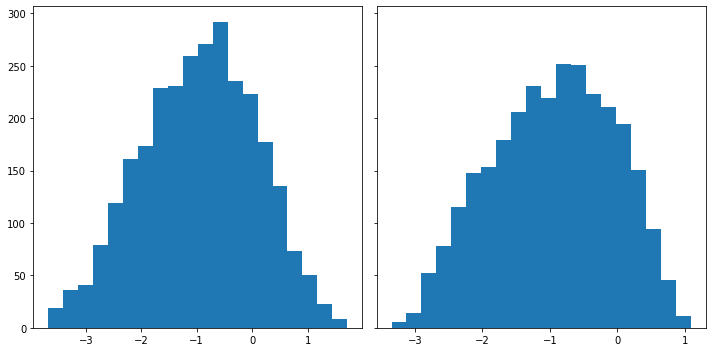

In [ ]:
n_bins = 20
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, tight_layout=True)

axs[0].hist(df.target, bins=n_bins);
axs[1].hist(df.prediction, bins=n_bins);

#### Notes:    
- kl_loss (Kullback–Leibler divergence) trong toán thống kê (information gain) Ý tưởng dựa trên khoảng cách giữa 2 phân phối (https://pytorch.org/docs/stable/generated/torch.nn.KLDivLoss.html).

- 



## Nhìn lại quá trình làm đồ án

Sau bao ngày vất vả làm đồ án thì bây giờ đã kết thúc. Bây giờ là lúc để ngồi uống coffee và tĩnh tâm nhìn lại quá trình làm.

- Mỗi thành viên: Đã gặp những khó khăn gì? (Hay mọi chuyện đều thuận lợi)
- Mỗi thành viên: Có học được gì hữu ích? (Hay không học được gì)
- Nhóm: Nếu có thêm thời gian thì sẽ làm gì?

Phần này có sao thì bạn nói vậy thôi, chứ không phải là viết
cho có, hoặc tự chế ra để nghe cho hay.

## Tài liệu tham khảo

Để hoàn thành đồ án này, nhóm bạn đã tham khảo những tài liệu nào?